# Heart Disease Prediction

Predict whether a person has heart disease or not.

Dataset Link - https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\ML\Datasets\Heart_Disease_uci\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploring the Dataset

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

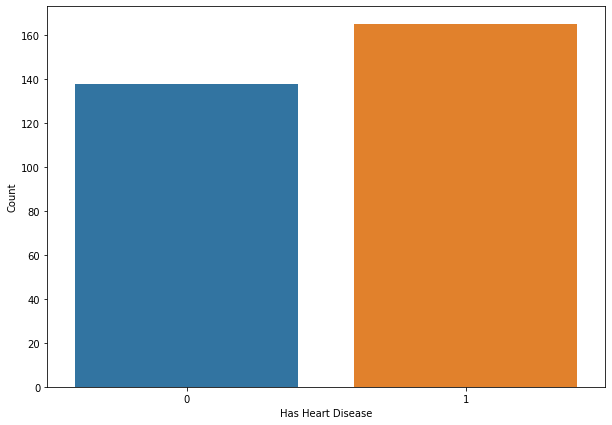

In [14]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='target', data=df)

# Headings
plt.xlabel('Has Heart Disease')
plt.ylabel('Count')

plt.show()

In [15]:
target = df[df['target'] == 1]
male_df = target[target['sex'] == 1]
female_df = target[target['sex'] == 0]

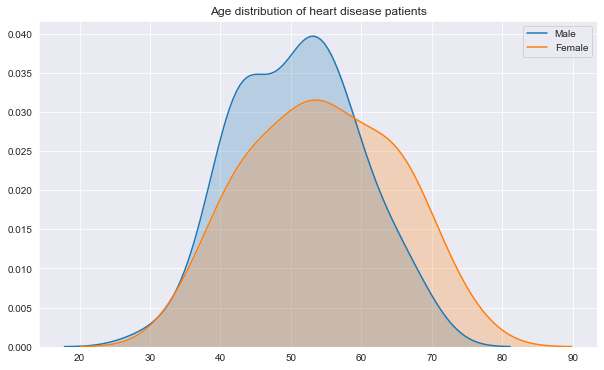

In [16]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
plt.title('Age distribution of heart disease patients')
sns.kdeplot(data = male_df['age'], label='Male', shade = True)
sns.kdeplot(data = female_df['age'], label = 'Female', shade = True)

From this plot it is clear that heart diseases are more common in males than females.

# Data Cleaning

In [17]:
df['thal'] = df['thal'].replace(2, 'normal_defect')
df['thal'] = df['thal'].replace(1, 'fixed_defect')
df['thal'] = df['thal'].replace(3, 'reversible_defect')
df['cp'] = df['cp'].replace(0, 'asymptomatic')
df['cp'] = df['cp'].replace(1, 'atypical angina')
df['cp'] = df['cp'].replace(2, 'non-anginal pain')
df['cp'] = df['cp'].replace(3, 'typical angina')
df['slope'] = df['slope'].replace(0, 'downsloping')
df['slope'] = df['slope'].replace(1, 'flat')
df['slope'] = df['slope'].replace(2, 'upsloping')
df['restecg'] = df['restecg'].replace(0, 'ventricular hypertrophy')
df['restecg'] = df['restecg'].replace(1, 'normal')
df['restecg'] = df['restecg'].replace(2, 'ST-T wave abnormality')

In [18]:
cp = pd.get_dummies(df['cp'], drop_first = True)
thal = pd.get_dummies(df['thal'], drop_first = True)
restecg = pd.get_dummies(df['restecg'], drop_first = True)
slope = pd.get_dummies(df['slope'], drop_first = True)
df = pd.concat([df, cp], axis=1)
df = pd.concat([df, thal], axis=1)
df = pd.concat([df, restecg], axis=1)
df = pd.concat([df, slope], axis=1)
df =df.drop(columns = ['cp', 'thal', 'slope', 'restecg'], axis = 1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,atypical angina,non-anginal pain,typical angina,fixed_defect,normal_defect,reversible_defect,normal,ventricular hypertrophy,flat,upsloping
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,0,0,1


In [19]:
df = df.drop(['fixed_defect'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,atypical angina,non-anginal pain,typical angina,normal_defect,reversible_defect,normal,ventricular hypertrophy,flat,upsloping
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,1,0,0,1


In [20]:
df = df.drop_duplicates()
df.shape

(302, 19)

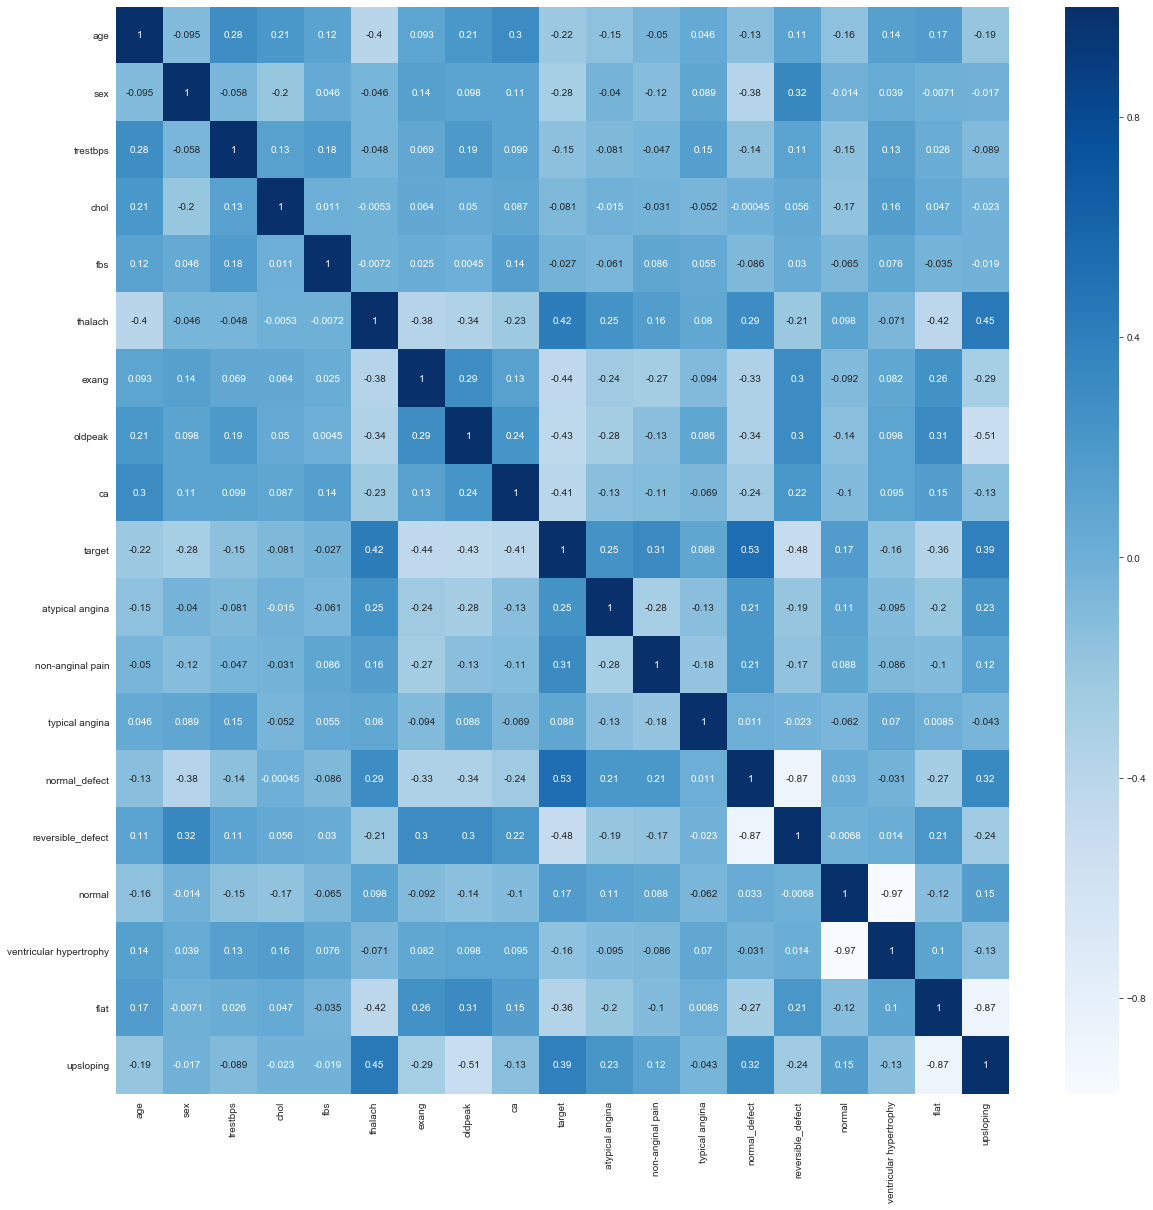

In [22]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Blues)

As none of the dependent variables have high correlation with each other, there is no need to eliminate variables based on correlation.

# Model Building

In [23]:
X = df.drop(['target'], axis = 1)
y = df['target']
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,atypical angina,non-anginal pain,typical angina,normal_defect,reversible_defect,normal,ventricular hypertrophy,flat,upsloping
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,1,0,0,1,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,1,0,0,1


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [25]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [26]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
# Creating a function to calculate best model for this problem

def best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }   
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.828571
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.767347
2,random_forest,{'n_estimators': 50},0.812245
3,svm,"{'C': 1, 'kernel': 'linear'}",0.828571


As Logistic Regression algorithm has the maximum accuracy we fine tune the model using hyperparameter optimization.

In [35]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(C=10, solver='lbfgs'), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 82.0%


In [36]:
# Creating Model
classifier = LogisticRegression(C=1, solver='lbfgs', random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# Trying ANN approach
clf = Sequential()

clf.add(Dense(output_dim = 8, init = 'he_uniform', activation = 'relu', input_dim = 18))
#clf.add(Dense(output_dim = 8, init = 'he_uniform', activation = 'relu'))
clf.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=8, kernel_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """


In [43]:
model_history = clf.fit(X_train, y_train, validation_split = 0.3, batch_size = 10, nb_epoch = 100)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Train on 168 samples, validate on 73 samples
Epoch 1/100
168/168 [==============================] - 1s 7ms/step - loss: 0.7611 - accuracy: 0.5357 - val_loss: 0.8340 - val_accuracy: 0.5479
Epoch 2/100
168/168 [==============================] - 0s 117us/step - loss: 0.7103 - accuracy: 0.5655 - val_loss: 0.7830 - val_accuracy: 0.5479
Epoch 3/100
168/168 [==============================] - 0s 121us/step - loss: 0.6708 - accuracy: 0.6131 - val_loss: 0.7363 - val_accuracy: 0.5616
Epoch 4/100
168/168 [==============================] - 0s 125us/step - loss: 0.6360 - accuracy: 0.6250 - val_loss: 0.6947 - val_accuracy: 0.5616
Epoch 5/100
168/168 [==============================] - 0s 142us/step - loss: 0.6059 - accuracy: 0.6548 - val_loss: 0.6582 - val_accuracy: 0.5890
Epoch 6/100
168/168 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6786 - val_loss: 0.6253 - val_accuracy: 0.6027
Epoch 7/100
168/168 [==================

168/168 [==============================] - 0s 131us/step - loss: 0.3357 - accuracy: 0.8631 - val_loss: 0.3326 - val_accuracy: 0.8904
Epoch 56/100
168/168 [==============================] - 0s 137us/step - loss: 0.3337 - accuracy: 0.8631 - val_loss: 0.3314 - val_accuracy: 0.8904
Epoch 57/100
168/168 [==============================] - 0s 119us/step - loss: 0.3317 - accuracy: 0.8631 - val_loss: 0.3303 - val_accuracy: 0.8904
Epoch 58/100
168/168 [==============================] - 0s 361us/step - loss: 0.3301 - accuracy: 0.8690 - val_loss: 0.3293 - val_accuracy: 0.8904
Epoch 59/100
168/168 [==============================] - 0s 321us/step - loss: 0.3281 - accuracy: 0.8690 - val_loss: 0.3278 - val_accuracy: 0.8904
Epoch 60/100
168/168 [==============================] - 0s 220us/step - loss: 0.3267 - accuracy: 0.8690 - val_loss: 0.3264 - val_accuracy: 0.8904
Epoch 61/100
168/168 [==============================] - 0s 123us/step - loss: 0.3247 - accuracy: 0.8690 - val_loss: 0.3257 - val_accuracy

In [46]:
for i in range (0, len(pred_y)):
    if pred_y[i] >= 0.5:
        pred_y[i] = 1
    else:
        pred_y[i] = 0

In [45]:
pred_y = clf.predict(X_test)

In [47]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [48]:
cm_ann = confusion_matrix(y_test, pred_y)
cm_ann

array([[26,  2],
       [ 7, 26]], dtype=int64)

# Model Evaluation

In [50]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  3],
       [ 5, 28]], dtype=int64)

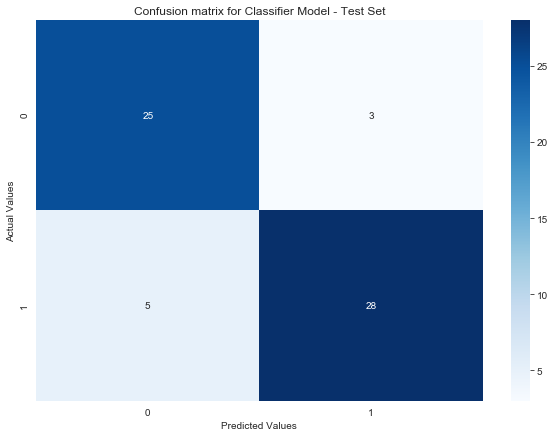

In [51]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [52]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 86.89%


In [53]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

